In [1]:
import os

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np
import xarray as xr
import rioxarray as rxr
import earthpy as et
import earthpy.plot as ep

# Prettier plotting with seaborn
import seaborn as sns
sns.set(font_scale=1.5, style="whitegrid")

# Get data and set working directory
et.data.get_data("colorado-flood")
os.chdir(os.path.join(et.io.HOME,
                      'earth-analytics',
                      'data'))

In [2]:
# Define relative paths to DTM and DSM files
dtm_path = os.path.join("colorado-flood",
                        "spatial",
                        "boulder-leehill-rd",
                        "pre-flood",
                        "lidar",
                        "pre_DTM.tif")

dsm_path = os.path.join("colorado-flood",
                        "spatial",
                        "boulder-leehill-rd",
                        "pre-flood",
                        "lidar",
                        "pre_DSM.tif")

# Open DTM and DSM files
pre_lidar_dtm = rxr.open_rasterio(dtm_path, masked=True).squeeze()
pre_lidar_dsm = rxr.open_rasterio(dsm_path, masked=True).squeeze()

# Create canopy height model (CHM)
pre_lidar_chm = pre_lidar_dsm - pre_lidar_dtm
pre_lidar_chm

<xarray.DataArray (y: 2000, x: 4000)>
array([[       nan,        nan,        nan, ..., 0.        , 0.17004395,
        0.960083  ],
       [       nan,        nan,        nan, ..., 0.        , 0.09008789,
        1.6400146 ],
       [       nan,        nan,        nan, ..., 0.        , 0.        ,
        0.07995605],
       ...,
       [       nan,        nan,        nan, ..., 0.        , 0.        ,
        0.        ],
       [       nan,        nan,        nan, ..., 0.        , 0.        ,
        0.        ],
       [       nan,        nan,        nan, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)
Coordinates:
    band         int64 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 0

In [3]:
# View min and max values in the data
print('CHM min value:', np.nanmin(pre_lidar_chm))
print('CHM max value:', np.nanmax(pre_lidar_chm))

CHM min value: 0.0
CHM max value: 26.930054


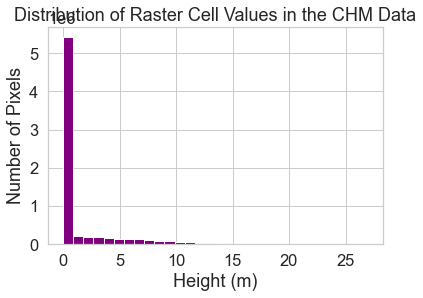

In [6]:
f, ax = plt.subplots()
pre_lidar_chm.plot.hist(color="purple", bins=30)
ax.set(title="Distribution of Raster Cell Values in the CHM Data",
       xlabel="Height (m)",
       ylabel="Number of Pixels")
plt.show()

In [7]:
# Check nodata value for your array
pre_lidar_chm.rio.nodata

In [8]:
data_min_value = np.nanmin(pre_lidar_chm)
data_max_value = np.nanmax(pre_lidar_chm)
print(data_min_value, data_max_value)

0.0 26.930054


In [9]:
class_bins = [-np.inf, 2, 7, 12, np.inf]
class_bins

[-inf, 2, 7, 12, inf]

In [10]:
pre_lidar_chm_class = xr.apply_ufunc(
    np.digitize,
    pre_lidar_chm,
    class_bins
)

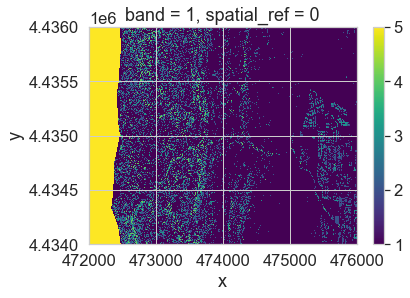

In [13]:
# Values of 5 represent missing data
im = pre_lidar_chm_class.plot.imshow()
ax.set_axis_off()

In [14]:
# Mask out values not equal to 5
pre_lidar_chm_class_ma = pre_lidar_chm_class.where(pre_lidar_chm_class != 5)
pre_lidar_chm_class_ma

<xarray.DataArray (y: 2000, x: 4000)>
array([[nan, nan, nan, ...,  1.,  1.,  1.],
       [nan, nan, nan, ...,  1.,  1.,  1.],
       [nan, nan, nan, ...,  1.,  1.,  1.],
       ...,
       [nan, nan, nan, ...,  1.,  1.,  1.],
       [nan, nan, nan, ...,  1.,  1.,  1.],
       [nan, nan, nan, ...,  1.,  1.,  1.]])
Coordinates:
    band         int64 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 0

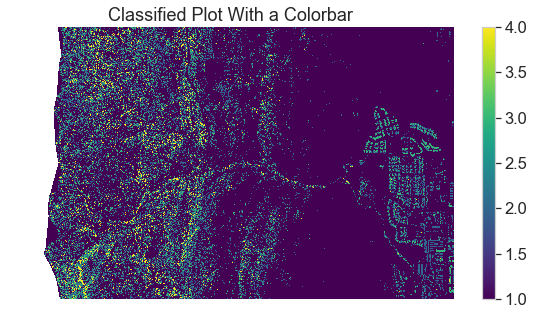

In [15]:
# Plot newly classified and masked raster
f, ax = plt.subplots(figsize=(10,5))
pre_lidar_chm_class_ma.plot.imshow()
ax.set(title="Classified Plot With a Colorbar")

ax.set_axis_off()
plt.show()

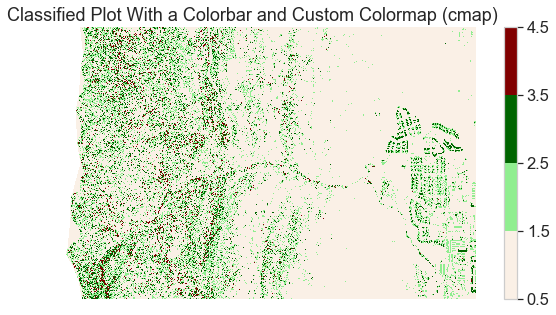

In [16]:
# Plot data using nicer colors
colors = ['linen', 'lightgreen', 'darkgreen', 'maroon']
class_bins = [.5, 1.5, 2.5, 3.5, 4.5]
cmap = ListedColormap(colors)
norm = BoundaryNorm(class_bins, len(colors))

# Plot newly classified and masked raster
f, ax = plt.subplots(figsize=(10, 5))
pre_lidar_chm_class_ma.plot.imshow(cmap=cmap, norm=norm)
ax.set(title="Classified Plot With a Colorbar and Custom Colormap (cmap)")
ax.set_axis_off()
plt.show()


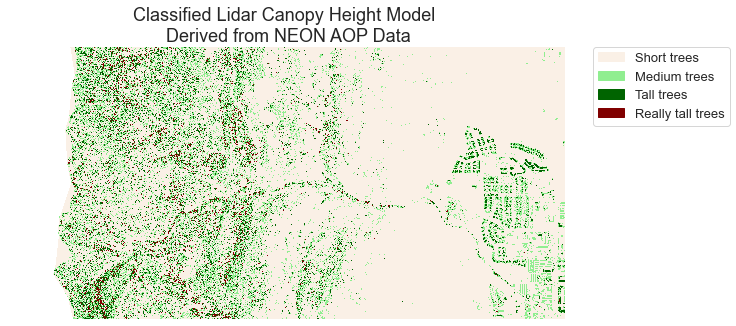

In [17]:
# Create a list of labels to use for your legend
height_class_labels = [
    "Short trees",
    "Medium trees",
    "Tall trees",
    "Really tall trees",
]

# Create a colormap from a list of colors
colors = [
    'linen',
    'lightgreen',
    'darkgreen',
    'maroon',
]

cmap = ListedColormap(colors)

class_bins = [.5, 1.5, 2.5, 3.5, 4.5]
norm = BoundaryNorm(class_bins, len(colors))

# Plot newly classified and masked raster
f, ax = plt.subplots(figsize=(10, 5))
im = pre_lidar_chm_class_ma.plot.imshow(
    cmap=cmap,
    norm=norm,
    # Turn off colorbar
    add_colorbar=False
)
# Add legend using earthpy
ep.draw_legend(im, titles=height_class_labels)
ax.set(title="Classified Lidar Canopy Height Model \n Derived from NEON AOP Data")
ax.set_axis_off()
plt.show()


# Optional Challenge: Plot Change Over Time

In [19]:
# Create post-flood CHM

# Define relative paths to DTM and DSM files
dtm_path = os.path.join("colorado-flood",
                        "spatial",
                        "boulder-leehill-rd",
                        "post-flood",
                        "lidar",
                        "post_DTM.tif")

dsm_path = os.path.join("colorado-flood",
                        "spatial",
                        "boulder-leehill-rd",
                        "post-flood",
                        "lidar",
                        "post_DSM.tif")

# Open DTM and DSM files
post_lidar_dtm = rxr.open_rasterio(dtm_path, masked=True).squeeze()
post_lidar_dsm = rxr.open_rasterio(dsm_path, masked=True).squeeze()

# Create canopy height model (CHM)
post_lidar_chm = post_lidar_dsm - post_lidar_dtm


In [62]:
# pre_lidar_chm[pre_lidar_chm == np.nanmax(pre_lidar_chm)] = np.nan
# post_lidar_chm[post_lidar_chm == np.nanmax(post_lidar_chm)] = np.nan

In [36]:
# Difference after - before 
diff_lidar_chm = post_lidar_chm - pre_lidar_chm

In [37]:
data_min_value = np.nanmin(diff_lidar_chm)
data_max_value = np.nanmax(diff_lidar_chm)
print(data_min_value, data_max_value)

-23.429932 24.45996


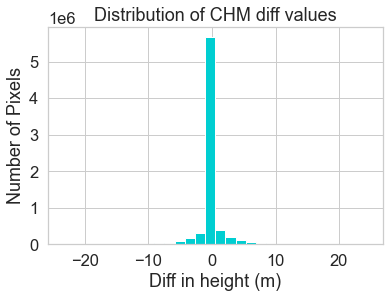

In [27]:
# Plot histogram of diff values
f, ax = plt.subplots()
diff_lidar_chm.plot.hist(color="darkturquoise", bins=30)
ax.set(title="Distribution of CHM diff values",
       xlabel="Diff in height (m)",
       ylabel="Number of Pixels")
plt.show()

In [28]:
data_min_value = np.nanmin(diff_lidar_chm)
data_max_value = np.nanmax(diff_lidar_chm)
print(data_min_value, data_max_value)

-23.429932 24.45996


In [41]:
class_bins = [-np.inf, -12, -7, -2, 0, 2, 7, 12, np.inf]
class_bins

[-inf, -12, -7, -2, 0, 2, 7, 12, inf]

In [44]:
diff_lidar_chm_class = xr.apply_ufunc(
    np.digitize,
    diff_lidar_chm,
    class_bins
)

In [59]:
diff_lidar_chm_class_ma = diff_lidar_chm_class.where(diff_lidar_chm_class != 9)
diff_lidar_chm_class_ma = diff_lidar_chm_class_ma.where(diff_lidar_chm_class_ma != 1)

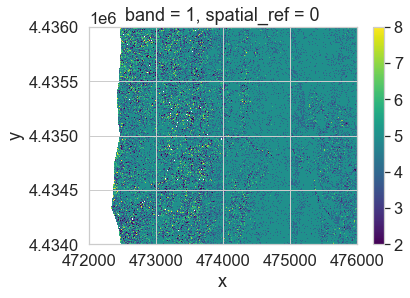

In [60]:
# Values of 5 represent missing data
im = diff_lidar_chm_class_ma.plot.imshow()
ax.set_axis_off()